<a href="https://colab.research.google.com/github/Kiransandilya/cs480student/blob/main/CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

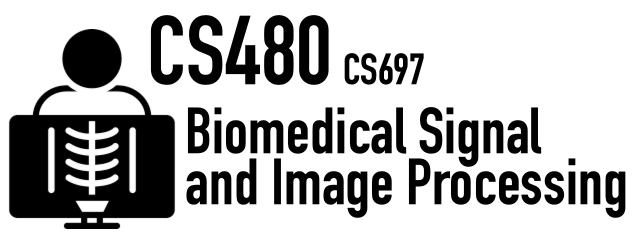
#Assignment 7

In [2]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

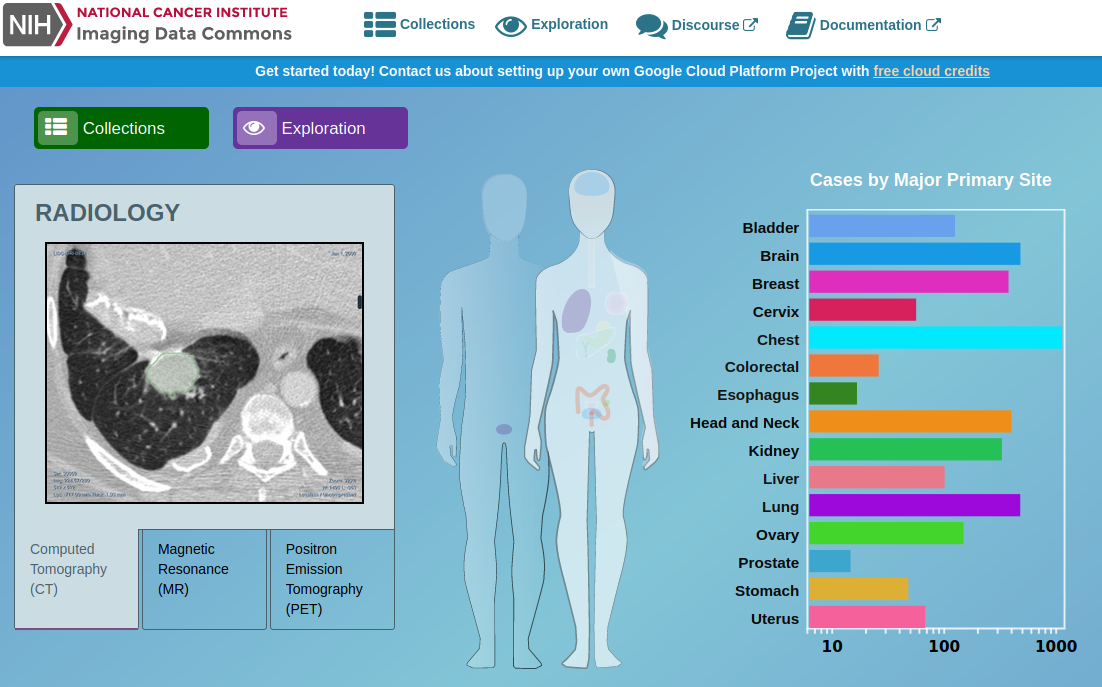

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [3]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [4]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

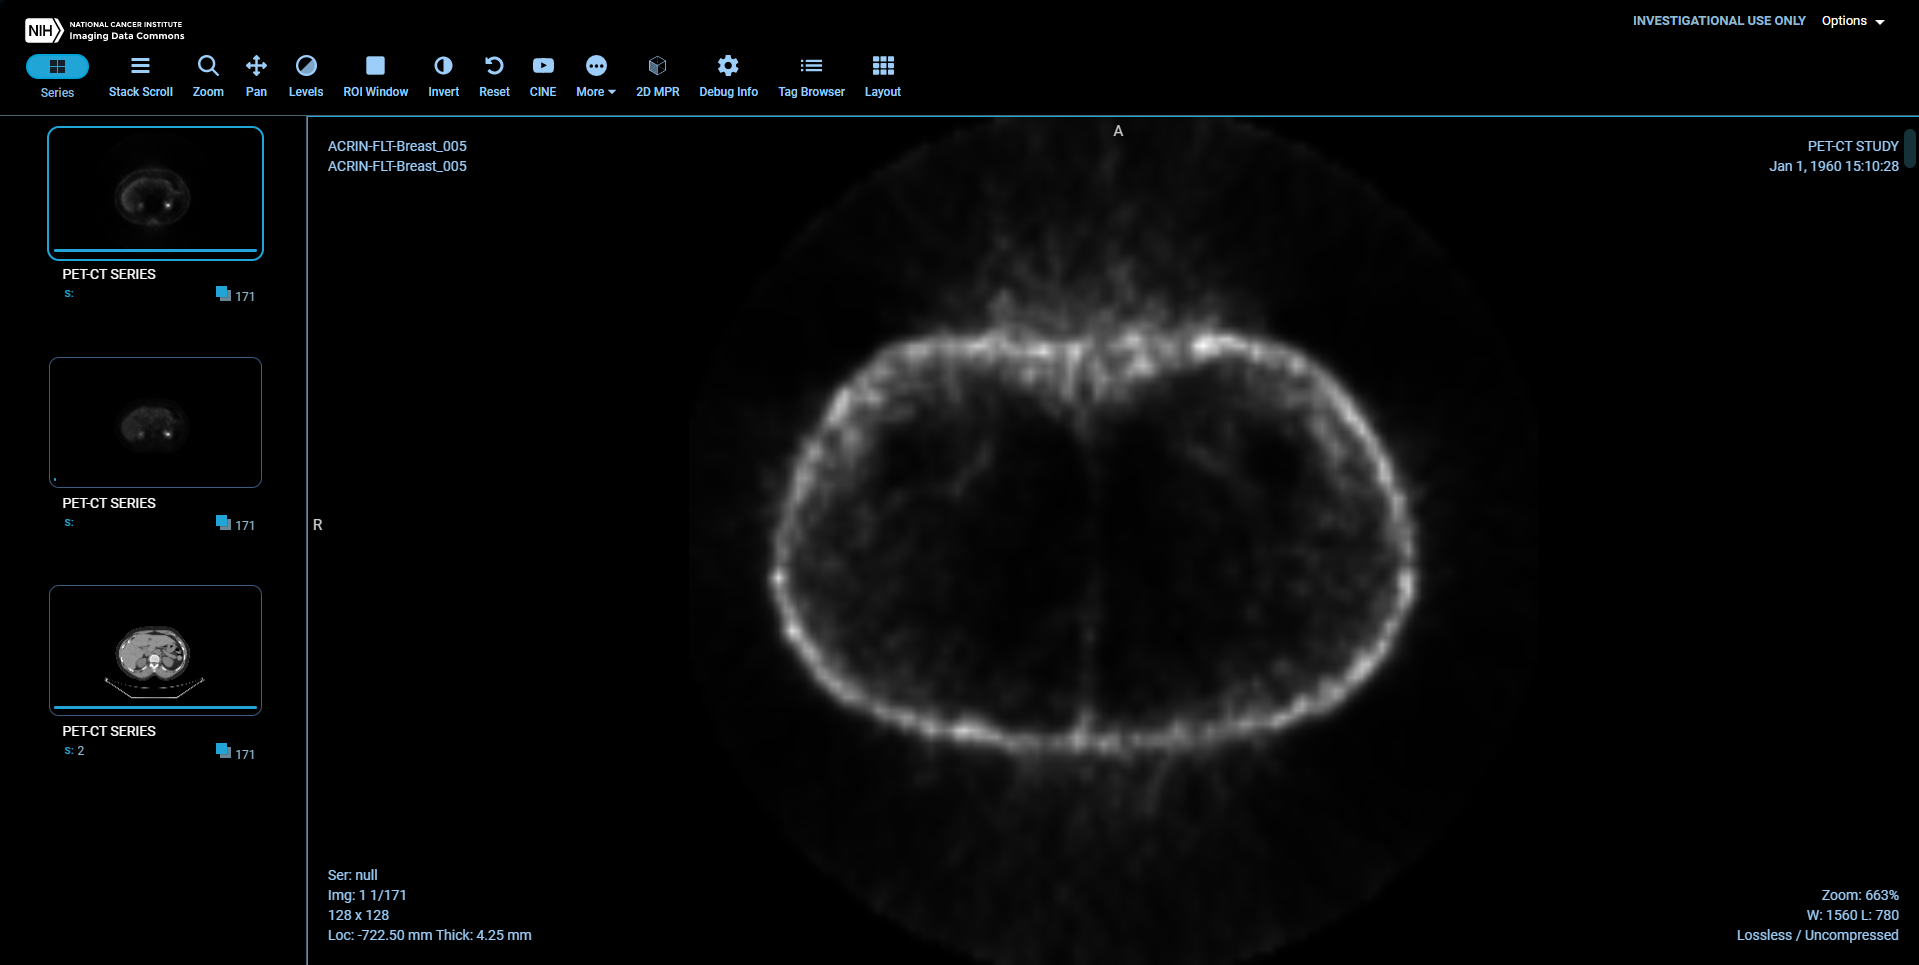

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [5]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [6]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [7]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [8]:
# TODO: Paste a screenshot showing the 2-column layout below.

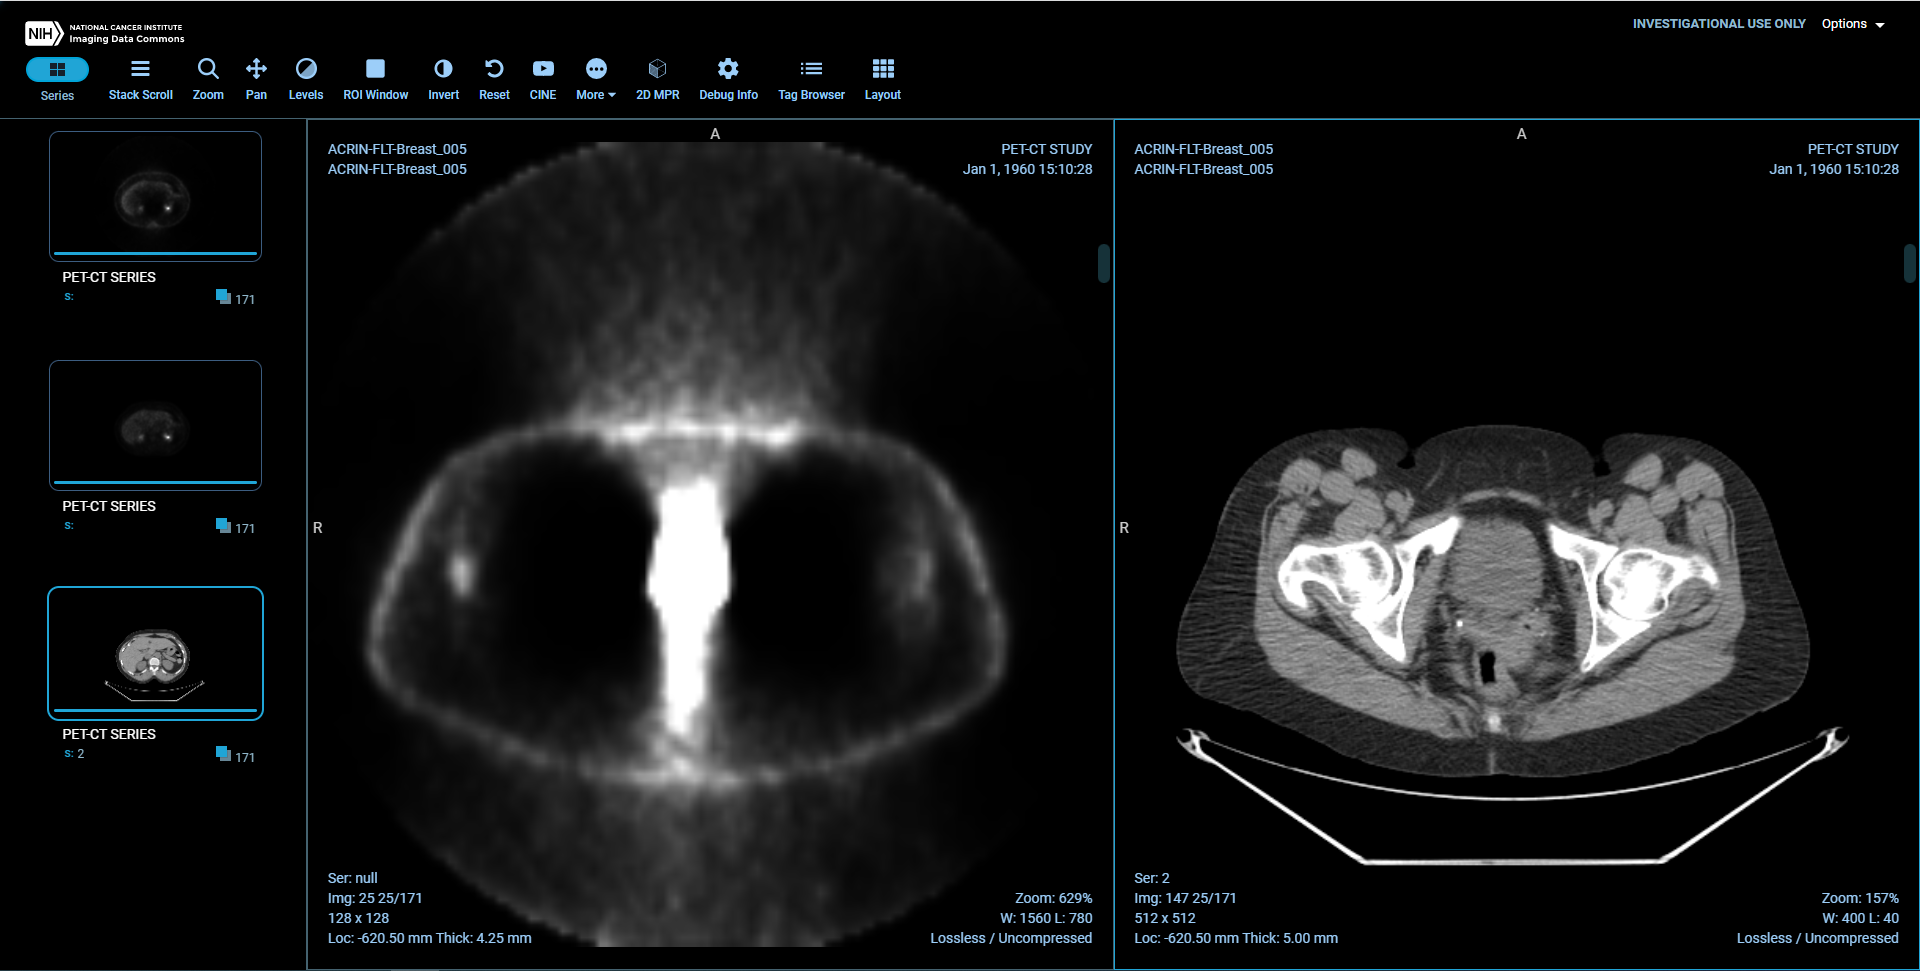

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [9]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [10]:
# Question 1): What is MPR?
#

MPR which is known as Multiplanar reformation or reconstruction involves the process of converting data from an imaging modality acquired in a certain plane, usually axial, into another plane 1. 

This is mostly performed with thin-slice data from volumetric CT in the axial plane, but it may be accomplished with scanning in any plane and whichever modality that is capable of cross-sectional imaging, that includes magnatic resonance imaging (MRI), PET and SPECT.

In [11]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

In [12]:
# TODO: YOUR ANSWER

MIP (Maximum Intensity Projection) is a feature that consists in highlighting the voxel with the highest attenuation value at all viewings and full volume for a 2D image. With MIP, it is possible to find all hyperdensing structures in a volume, from a chosen range. This method tends to exhibit contrasting bone structures, as well as hiding structures of lower attenuation. 

Average Intensity Projection (AIP) AIP operates in a similar way to the other modes of intensity projection, but instead of showing voxels with the highest/lowest attenuation, shows the average attenuation. This tool may be useful for identify the internal structures of a solid organ or the walls of hollow structures, such as the blood vessels or the intestine. To use the AIP projection mode, simply click on the right arrow of the "MIP" tool and select "AIP".

Minimum Intensity Projection (MinIP) 
The process of the MinIP is very similar to the MIP, but instead of showing voxels with the highest attenuation, shows the ones of less attenuation. With MinIP only the hypodense structures of the volume are represented, therefore, it is the ideal tool for the detection, localization and quantification of ground-glass and linear attenuation patterns in chest scans. MinIP is particularly useful for analysing the bile tree and the pancreatic duct, which are hypodense when compared with the surrounding tissue, especially in the pancreatic fase. To access this feature click on the button on the right arrow of the "MIP" button and select "MinIP"




In [13]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

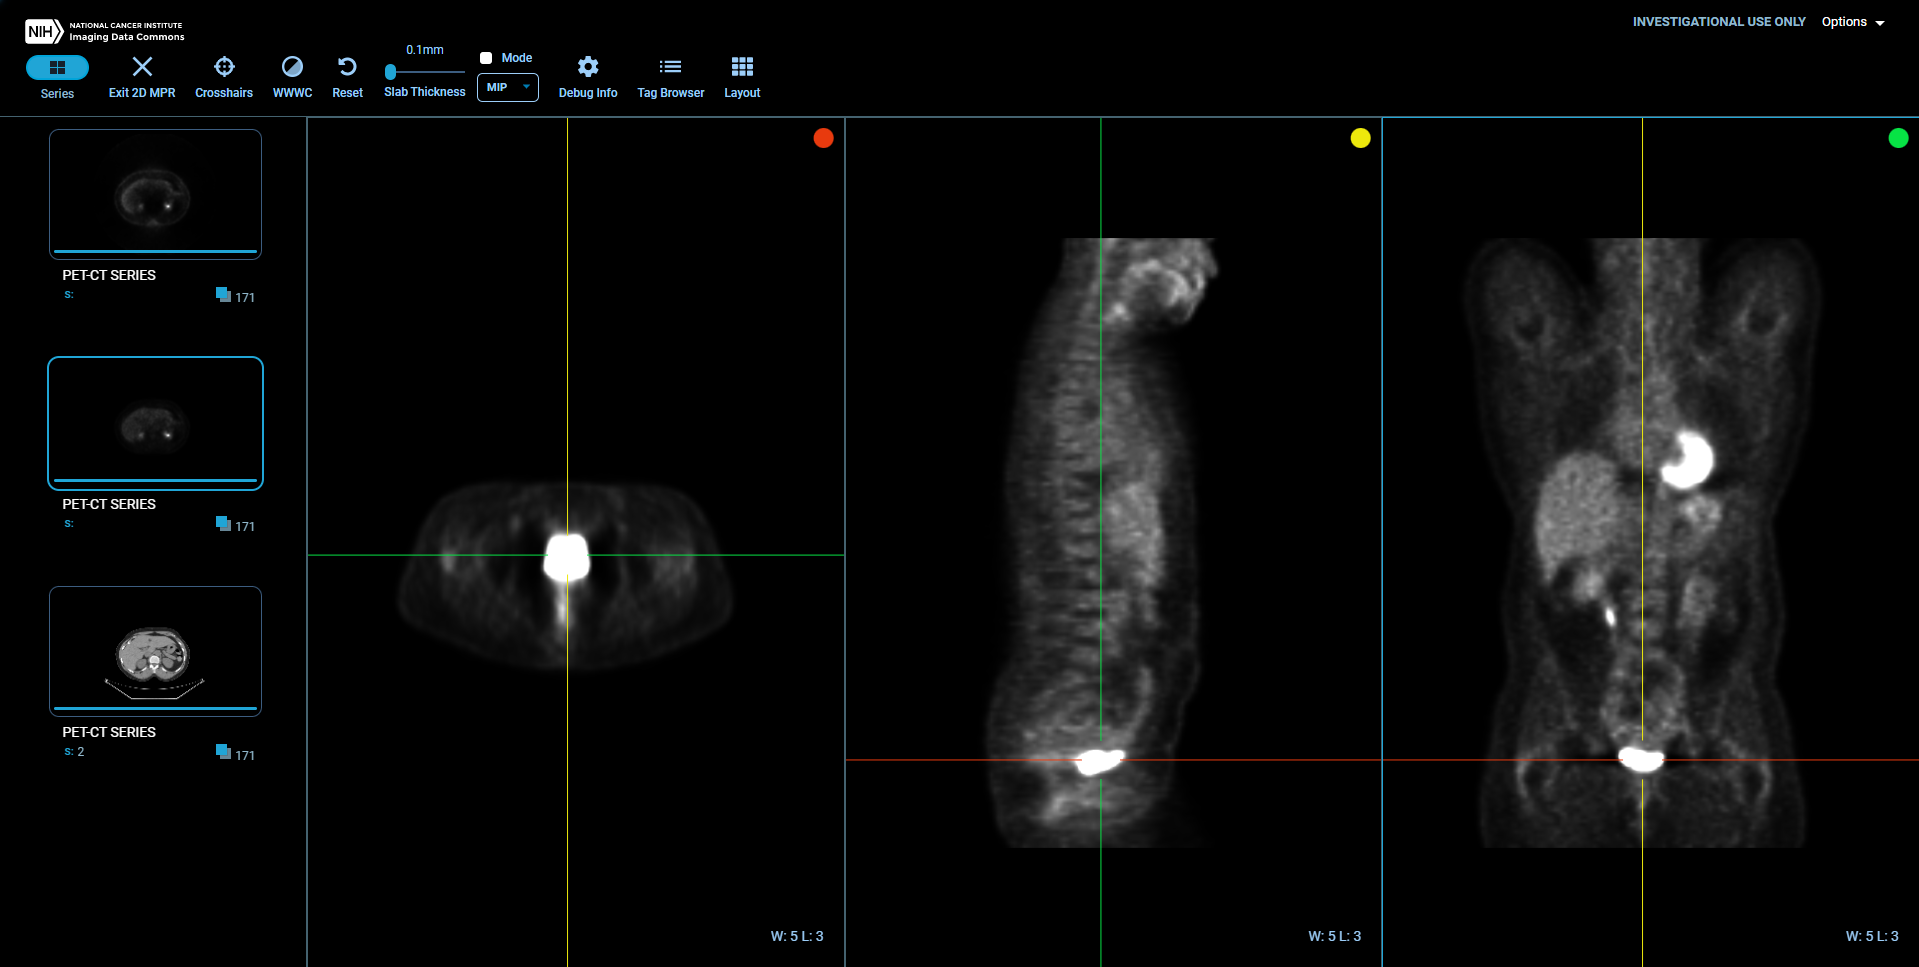

In [14]:
# Question 3): What does the Slab Thickness slider do?
#

In [15]:
# TODO: YOUR ANSWER

The thickness of the slice is controlled by the slab thickness slider.

**Task 4**: Let's access the pixel data! [20 Points]

In [1]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [16]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [17]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [18]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [ ]:
# TODO: YOUR ANSWER

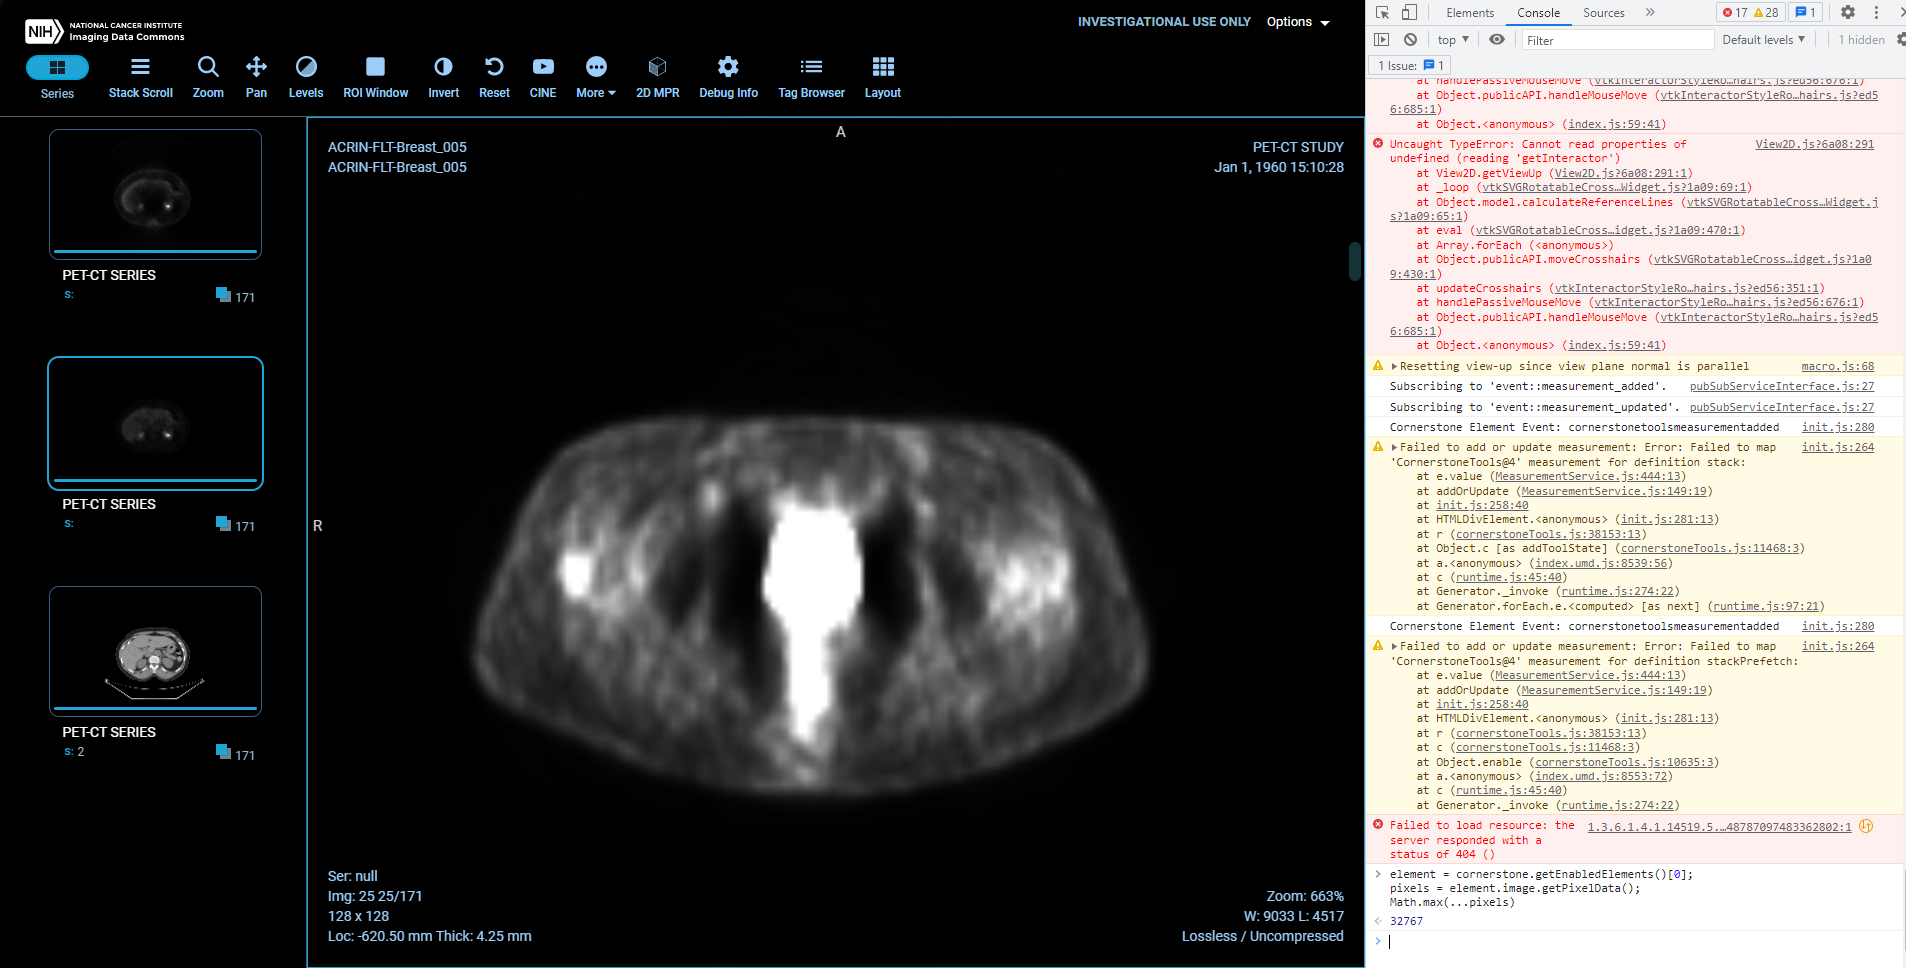

The maximum pixel value is 32767

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [ ]:
#
#
# TODO: YOUR CODE GOES HERE
#
#
element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();
temp_pixels  =Array.from(pixels);

w = element.image.width;
h = element.image.height;

var pixels_reshape = [];
while(temp_pixels.length) pixels_reshape.push(temp_pixels.splice(0,w));

var temp_new_pixels = new Array(h);
for (i=0; i < temp_new_pixels.length; i++){
  temp_new_pixels[i]=new Array(w);
  temp_new_pixels[i].fill(0)
}

for (var i = 1; i < h-1; i++) {
  for (var j = 1; j < w-1; j++) {
    var UpperLeft = pixels_reshape[i-1][j-1];
    var UpperMiddle = pixels_reshape[i-1][j];
    var UpperRight = pixels_reshape[i-1][j+1];
    var CenterLeft = pixels_reshape[i][j-1];
    var CenterMiddle = pixels_reshape[i][j];
    var CenterRight = pixels_reshape[i][j+1];
    var LowerLeft = pixels_reshape[i+1][j-1];
    var LowerMiddle = pixels_reshape[i+1][j];
    var LowerRight = pixels_reshape[i+1][j+1];
    var valx = UpperLeft + CenterLeft*2 + LowerLeft - UpperRight - CenterRight*2 - LowerRight;
    var valy = UpperLeft + UpperMiddle*2 + UpperRight - LowerLeft - LowerMiddle*2 - LowerRight;

    temp_new_pixels[i][j]=Math.abs(valx)+Math.abs(valy);    
  }
}

var new_pixels = Array.prototype.concat.apply([], temp_new_pixels);
pixels.set(new_pixels);
cornerstone.renderGrayscaleImage(element, true)

In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

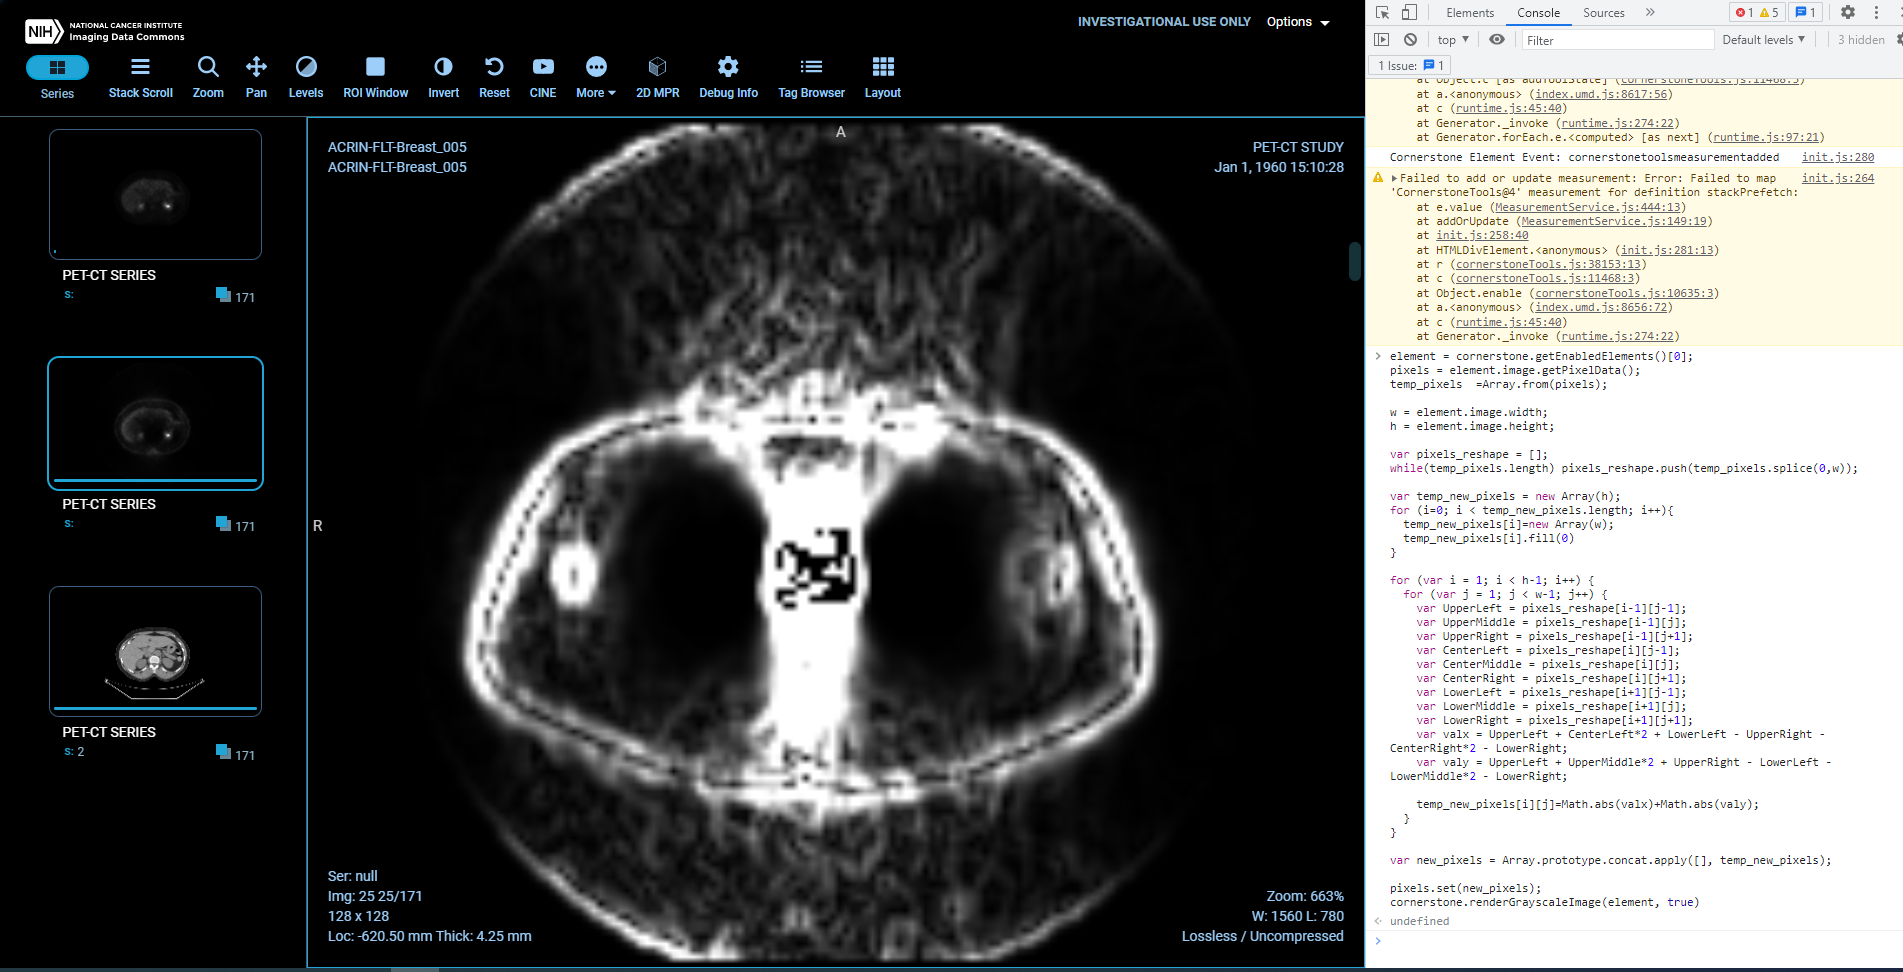

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

cornerstone.renderGrayscaleImage(element, true)

Collobroration with Divya Thota
References:
https://docs.medicalharbour.com/us/athena-dicom-viewer-en/6-tools/686-minimum-intensity-projection-minip/#open

https://docs.medicalharbour.com/us/athena-dicom-viewer-en/6-tools/685-maximum-intensity-projection-mip/#open

https://docs.medicalharbour.com/us/athena-dicom-viewer-en/6-tools/687-average-intensity-projection-aip/#open

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#